# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

# 0, Load The Data #
# File locations
training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

# Load pickle files
with open(training_file, 'rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

with open(validation_file, 'rb') as f:
    valid = pickle.load(f)
X_valid, y_valid = valid['features'], valid['labels']

with open(testing_file, 'rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Image information
image_shape = X_train.shape[1:]
n_label = len(set(y_valid))
print("Image shape: {}".format(image_shape))
print("There are {} labels".format(n_label))

# Number of images
n_train = len(X_train)
n_valid = len(X_valid)
n_test = len(X_test)
print("Training data set has {} images".format(n_train))
print("Validation data set has {} images".format(n_valid))
print("Testing data set has {} images".format(n_test))

Image shape: (32, 32, 3)
There are 43 labels
Training data set has 34799 images
Validation data set has 4410 images
Testing data set has 12630 images


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

{2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 8: 1260, 3: 1260, 11: 1170, 18: 1080, 35: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 15: 540, 26: 540, 28: 480, 23: 450, 30: 390, 34: 360, 6: 360, 16: 360, 22: 330, 36: 330, 40: 300, 20: 300, 21: 270, 39: 270, 24: 240, 29: 240, 32: 210, 42: 210, 41: 210, 27: 210, 37: 180, 19: 180, 0: 180}


<Container object of 43 artists>

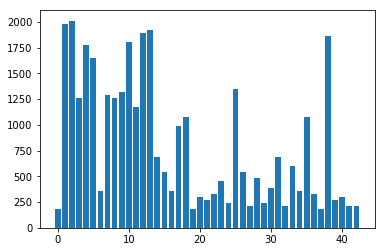

In [3]:
# Visualize train data set distribution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ser = pd.Series(np.sort(y_train))
data_count = dict(ser.value_counts())
print(data_count)
plt.bar(range(43), np.array([data_count[k] for k in range(43)]))

##### Process data set using data augmentation method to increase and balance data set

In [4]:
# Define data augmentation function
from skimage.util import random_noise
from skimage.transform import rotate

# Apply pepper noise
def pepper_noise(image): 
    return np.uint8(random_noise(image, mode='pepper', amount=0.002)*255)

# Apply clockwise rotation
def cw_rotate(image):
    return np.uint8(rotate(image, -5, mode='edge')*255)

# Apply anti-clockwise rotation
def acw_rotate(image):
    return np.uint8(rotate(image, 5, mode='edge')*255)

# Apply change of brightness and contract
def b_and_c(image):
    return np.uint8(np.clip((1.1*image + 10), 0, 255))


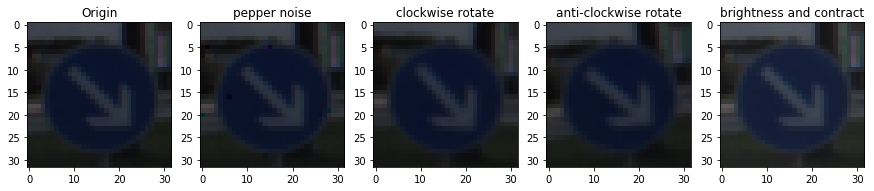

In [5]:
import random

# Test data augmentation functions on random image
# Visualize random image to check
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

fig, axes = plt.subplots(1, 5, figsize=(15, 20))
axes[0].set_title("Origin")
axes[0].imshow(image)
axes[1].set_title("pepper noise")
axes[1].imshow(pepper_noise(image))
axes[2].set_title("clockwise rotate")
axes[2].imshow(cw_rotate(image))
axes[3].set_title("anti-clockwise rotate")
axes[3].imshow(acw_rotate(image))
axes[4].set_title("brightness and contract")
axes[4].imshow(b_and_c(image))

In [6]:
new_X_train = []
new_y_train = []

# Loop over all different labels
start = 0
for i in range(n_label):
    # Exact data in same labels
    end = start + data_count[y_train[start]]
    X = X_train[start:end]
    y = y_train[start:end]
    start = end
    
    # Implement data agumentation to increase number of data set if necessary
    if 225 > len(y) >= 0:
        X_aug1 = np.array([b_and_c(image) for image in X])
        X_aug2 = np.array([cw_rotate(image) for image in X])
        X_aug3 = np.array([acw_rotate(image) for image in X])
        X_aug4 = np.array([pepper_noise(image) for image in X])
        X = np.concatenate((X, X_aug1, X_aug2, X_aug3, X_aug4))
        y = np.concatenate((y, y, y, y, y))
    elif 300 > len(y) >= 225:
        X_aug1 = np.array([b_and_c(image) for image in X])
        X_aug2 = np.array([cw_rotate(image) for image in X])
        X_aug3 = np.array([acw_rotate(image) for image in X])
        X = np.concatenate((X, X_aug1, X_aug2, X_aug3))
        y = np.concatenate((y, y, y, y))
    elif 450 > len(y) >= 300:
        X_aug1 = np.array([b_and_c(image) for image in X])
        X_aug2 = np.array([cw_rotate(image) for image in X])
        X = np.concatenate((X, X_aug1, X_aug2))
        y = np.concatenate((y, y, y))
    elif 900 > len(y) >= 450:
        X_aug1 = np.array([b_and_c(image) for image in X])
        X = np.concatenate((X, X_aug1))
        y = np.concatenate((y, y))
    # If the labels number is outlarge the required number
    if len(y) >= 900:
        X = X[:900]
        y = y[:900]
    
    # Combine all the data 
    if i != 0:    
        new_X_train = np.concatenate((new_X_train, X))
        new_y_train = np.concatenate((new_y_train, y))
    else:
        new_X_train = X
        new_y_train = y

{31: 900, 5: 900, 9: 900, 40: 900, 8: 900, 39: 900, 7: 900, 38: 900, 6: 900, 37: 900, 36: 900, 10: 900, 4: 900, 35: 900, 3: 900, 34: 900, 2: 900, 33: 900, 1: 900, 32: 900, 41: 900, 42: 900, 30: 900, 21: 900, 29: 900, 28: 900, 27: 900, 26: 900, 25: 900, 24: 900, 23: 900, 22: 900, 20: 900, 11: 900, 19: 900, 18: 900, 17: 900, 16: 900, 15: 900, 14: 900, 13: 900, 12: 900, 0: 900}


<Container object of 43 artists>

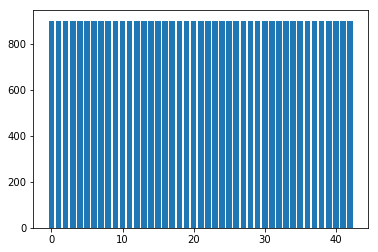

In [7]:
# Display new data set distribution
ser = pd.Series(np.sort(new_y_train))
data_count = dict(ser.value_counts())
print(data_count)
plt.bar(range(43), np.array([data_count[k] for k in range(43)]))

In [8]:
# Image information
image_shape = new_X_train.shape[1:]
n_label = len(set(y_valid))
print("Image shape: {}".format(image_shape))
print("There are {} labels".format(n_label))

# Number of images
n_train = len(new_X_train)
n_valid = len(X_valid)
n_test = len(X_test)
print("Training data set has {} images".format(n_train))
print("Validation data set has {} images".format(n_valid))
print("Testing data set has {} images".format(n_test))

Image shape: (32, 32, 3)
There are 43 labels
Training data set has 38700 images
Validation data set has 4410 images
Testing data set has 12630 images


##### Visualization of a single image of new train data set

In [9]:
# Load labels' name
import csv

class_name = {}
with open('signnames.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        class_name[row[0]] = row[1]

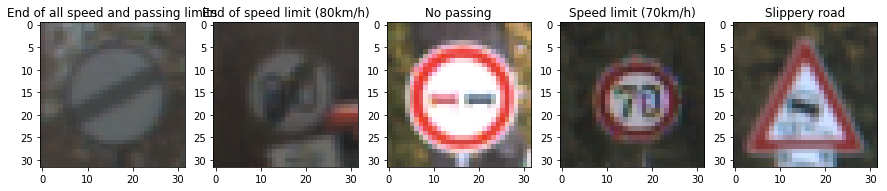

In [10]:
# Visualization of a random image

n_image = 5
# Visualize random image to check
fig, axes = plt.subplots(1, n_image, figsize=(15, 20))
for i in range(n_image):
    index = random.randint(0, len(new_X_train))
    image = new_X_train[index].squeeze()
    axes[i].set_title(class_name["{}".format(new_y_train[index])])
    axes[i].imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [11]:
# Grayscale convertion
import cv2

# Image gray scale convert
X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in new_X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])
X_valid_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_valid])

In [12]:
# Recover shape (sample, size, size, channel)
X_train = X_train_gray[:, :, :, np.newaxis]
X_valid = X_valid_gray[:, :, :, np.newaxis]
X_test = X_test_gray[:, :, :, np.newaxis]

# Normalization
mean_, std_ = np.mean(X_train), np.std(X_train)
X_train = ((X_train-mean_) / std_)
X_valid = ((X_valid-mean_) / std_)
X_test = ((X_test-mean_) / std_)
y_train = new_y_train

### Set up TensorFlow

In [13]:
import tensorflow as tf

# Learning rate, epoch and batch size
LEARNING_RATE = 0.0069
EPOCHS = 250
BATCH_SIZE = 2048 # Set a large batch size to avoid overfitting

### Mode Architecture

In [14]:
from tensorflow.contrib.layers import flatten

# Define holders to place data
x = tf.placeholder(tf.float32, (None, 32, 32, X_train.shape[3]))  # Input
y = tf.placeholder(tf.int32, None)  # Input label
training = tf.placeholder(tf.bool)
one_hot_y = tf.one_hot(y, 43)

mu = 0
sigma = 0.1
W = [
    tf.Variable(tf.truncated_normal([5, 5, X_train.shape[3], 10], mean=mu, stddev=sigma)),
    tf.Variable(tf.truncated_normal([3, 3, 10, 20], mean=mu, stddev=sigma)),
    tf.Variable(tf.truncated_normal([6*6*20, 160], mean=mu, stddev=sigma)),
    tf.Variable(tf.truncated_normal([160, 120], mean=mu, stddev=sigma)),
    tf.Variable(tf.truncated_normal([120, 43], mean=mu, stddev=sigma))
]
b = [
    tf.Variable(tf.zeros(10)),
    tf.Variable(tf.zeros(20)),
    tf.Variable(tf.zeros(160)),
    tf.Variable(tf.zeros(120)),
    tf.Variable(tf.zeros(43))
]


# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x10.
strides = [1, 1, 1, 1]
conv1 = tf.nn.conv2d(x, W[0], strides, padding='VALID')
conv1 = tf.nn.bias_add(conv1, b[0])
# Batch Nomalization
conv1_bn = tf.layers.batch_normalization(conv1, training=training)
# Activation.
conv1_a = tf.nn.relu(conv1_bn)
# Pooling. Input = 28x28x10. Output = 14x14x10.
conv1_p = tf.nn.max_pool(conv1_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Layer 2: Convolutional. Output = 12x12x20.
strides2 = [1, 1, 1, 1]
conv2 = tf.nn.conv2d(conv1_p, W[1], strides, padding='VALID')
conv2 = tf.nn.bias_add(conv2, b[1])
# # Batch Nomalization
conv2_bn = tf.layers.batch_normalization(conv2, training=training)
# Activation.
conv2_a = tf.nn.relu(conv2_bn)
# Pooling. Input = 12x12x20. Output = 6x6x20
conv2_p = tf.nn.max_pool(conv2_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# Flatten. Input = 6x6x20. Output = 720.
conv2_f = flatten(conv2_p)

# Layer 3: Fully Connected. Input = 720. Output = 160.
fc3 = tf.add(tf.matmul(conv2_f, W[2]), b[2])
# # Batch Nomalization
fc3 = tf.layers.batch_normalization(fc3, training=training)
# Activation.
fc3 = tf.nn.relu(fc3)

# Layer 4: Fully Connected. Input = 160. Output = 120.
fc4 = tf.add(tf.matmul(fc3, W[3]), b[3])
# # Batch Nomalization
fc4 = tf.layers.batch_normalization(fc4, training=training)
# Activation.
fc4 = tf.nn.relu(fc4)

# Layer 5: Fully Connected. Input = 120 Output = n_label = 43.
logits = tf.add(tf.matmul(fc4, W[4]), b[4])
# Batch Nomalization
logits = tf.layers.batch_normalization(logits, training=training)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
# Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)

# Update operation 
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    training_operation = optimizer.minimize(loss_operation)

In [16]:
# Validation Model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation],
                                  feed_dict={x: batch_x, y: batch_y, training: False})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

In [17]:
from sklearn.utils import shuffle
import time

with tf.Session() as sess:
    since = time.time()
    plot_x = []
    plot_y1 = []
    plot_y2 = []
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        tick = time.time()
        total_train_loss = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            to, train_loss = sess.run([training_operation, loss_operation],
                                      feed_dict={x: batch_x, y: batch_y, training: True})
            total_train_loss += train_loss * BATCH_SIZE

        train_loss = total_train_loss / num_examples
        validation_accuracy, validation_loss = evaluate(X_valid, y_valid)
        training_time = time.time() - tick
        print("EPOCH {} ...".format(i+1))
        print("Training Loss = {:.4f}".format(train_loss))
        print("Validation Loss = {:.4f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training time = {:.3f}s".format(training_time))

        plot_x.append(i)
        plot_y1.append(train_loss)
        plot_y2.append(validation_loss)

        
    print("Total training time = {:.3f}s".format(time.time() - since))
    saver.save(sess, "./Model/model.ckpt")
    print("Model saved")

Training...
EPOCH 1 ...
Training Loss = 1.8216
Validation Loss = 3.2527
Validation Accuracy = 0.490
Training time = 7.076s
EPOCH 2 ...
Training Loss = 0.5182
Validation Loss = 2.7257
Validation Accuracy = 0.601
Training time = 4.266s
EPOCH 3 ...
Training Loss = 0.2042
Validation Loss = 2.3511
Validation Accuracy = 0.568
Training time = 2.991s
EPOCH 4 ...
Training Loss = 0.1031
Validation Loss = 2.0189
Validation Accuracy = 0.615
Training time = 3.101s
EPOCH 5 ...
Training Loss = 0.0627
Validation Loss = 1.7422
Validation Accuracy = 0.648
Training time = 2.938s
EPOCH 6 ...
Training Loss = 0.0435
Validation Loss = 1.5471
Validation Accuracy = 0.665
Training time = 2.908s
EPOCH 7 ...
Training Loss = 0.0318
Validation Loss = 1.2978
Validation Accuracy = 0.740
Training time = 2.906s
EPOCH 8 ...
Training Loss = 0.0245
Validation Loss = 1.0797
Validation Accuracy = 0.785
Training time = 2.936s
EPOCH 9 ...
Training Loss = 0.0190
Validation Loss = 0.9245
Validation Accuracy = 0.807
Training tim

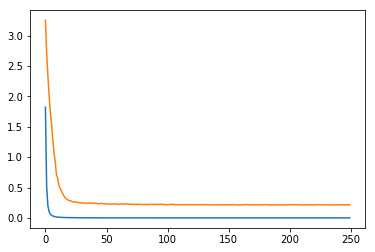

In [18]:
# Display learning history

plt.plot(plot_x, plot_y1)
plt.plot(plot_x, plot_y2)

---

## Step 3: Test a Model on New Images

### Apply on test set

In [19]:
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    test_accuracy, test_loss = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt
Test Accuracy = 0.935


To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output 5 Images

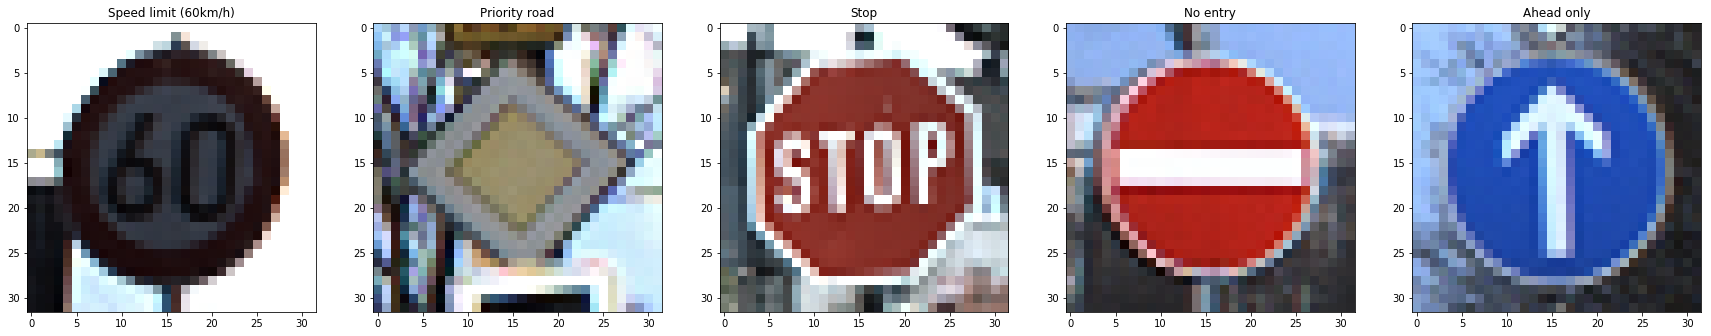

In [20]:
# Load images
n_test_samples = 5
sample_images = []
sample_labels = [3, 12, 14, 17, 35]
sample_labels_test = [class_name["{}".format(i)] for i in sample_labels]

fig, axes = plt.subplots(1, n_test_samples, figsize=(30, 15))
for i in range(n_test_samples):
    image = cv2.cvtColor(cv2.imread("test_samples/{}.png".format(sample_labels[i])), cv2.COLOR_BGR2RGB)
    axes[i].set_title(sample_labels_test[i])
    axes[i].imshow(image)
    sample_images.append(image)

### Predict the Sign Type for Each Image

In [21]:
# Pre-processing

# Test in trained model
sample_images_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in sample_images])
# Recover shape (sample, size, size, channel)
sample_images = sample_images_gray[:, :, :, np.newaxis]
# Normalization
sample_images = ((sample_images - mean_) / std_)

In [22]:
# Predict in trained model
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    prob = tf.nn.softmax(logits = logits)
    pred = tf.argmax(prob, 1)
    predict_labels = sess.run(pred, feed_dict={x: sample_images, y: sample_labels, training: False})
print("Predict results:")
print([class_name["{}".format(i)] for i in predict_labels])

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt
Predict results:
['Speed limit (60km/h)', 'Priority road', 'Stop', 'No entry', 'Ahead only']


### Analyze Performance

In [23]:
### Calculate the accuracy for these 5 new images.
accuracy = np.mean((np.equal(sample_labels, predict_labels)), dtype="float")
print("Predict accuracy of these 5 new images is: {:.1f}".format(accuracy))

Predict accuracy of these 5 new images is: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt
[[9.99032974e-01 9.09930022e-05 8.79734289e-05 5.85264243e-05
  5.39242646e-05]
 [9.99930620e-01 7.12463998e-06 6.06627009e-06 5.78743766e-06
  5.60168928e-06]
 [9.99975562e-01 2.49040227e-06 1.38900771e-06 1.34277320e-06
  1.29189402e-06]
 [9.99999046e-01 1.28418492e-07 1.10178405e-07 9.26430133e-08
  7.45978070e-08]
 [9.99932885e-01 2.38342886e-06 2.37472568e-06 2.21770938e-06
  2.20223342e-06]]


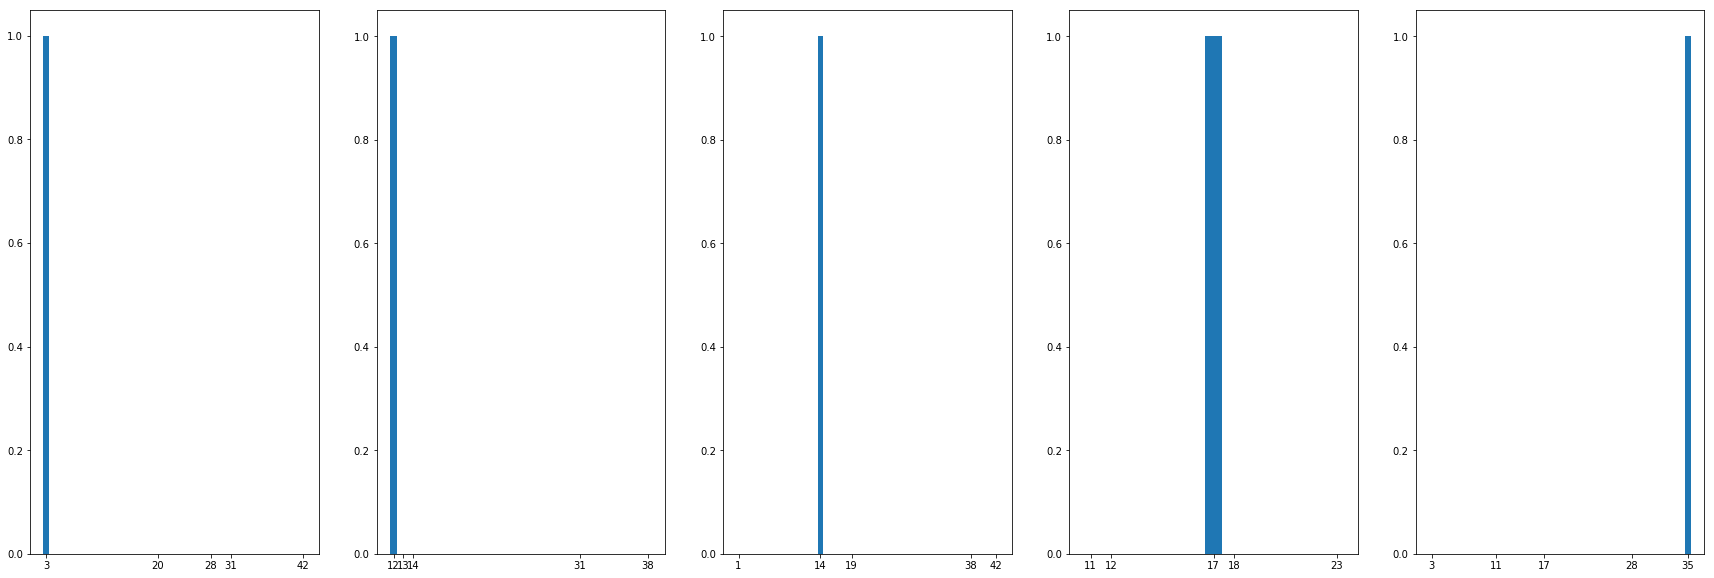

In [24]:
### Print out the top five softmax probabilities for the predictions on the 5 German traffic sign images. 
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    prob = tf.nn.softmax(logits = logits)
    top = tf.nn.top_k(prob, k=5)
    result = sess.run(top, feed_dict={x: sample_images, y: sample_labels, training: False})
    proba, index = np.array(result)
    
print(proba)
fig, axes = plt.subplots(1, n_test_samples, figsize=(30, 10))
for i in range(n_test_samples):
    axes[i].set_xticks(index[i])
    axes[i].bar(index[i] ,proba[i])

#### Discuss Predicted Probabilities

We can see clearly that all the first-ranked predictions' possibility are higher than 99% whereas the second ones are lower than 0.3%,
which proves that this model is well-trained and can precisely predict the thraffic signs.

### Wrong Prediction Discussion
For a further discussion, I extract some of the wrongly predicted images from test set and print out their top five softmax probabilities.

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt


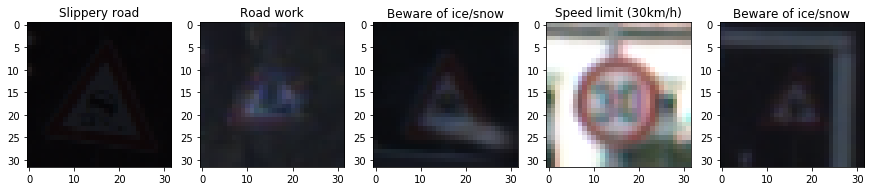

In [25]:
# Reload images without pre-processing
with open(testing_file, 'rb') as f:
    test = pickle.load(f)
X_test_display, y_test = test['features'], test['labels']

# Exact wrongly predicted images
n_wrong_samples = 5
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    correct = sess.run(correct_prediction, feed_dict={x: X_test, y: y_test, training: False})
wrong_images_display = [X_test_display[~correct][i*5] for i in range(n_wrong_samples)]
wrong_labels = [y_test[~correct][i*5] for i in range(n_wrong_samples)]
wrong_labels_test = [class_name["{}".format(i)] for i in wrong_labels]

# Display these images
fig, axes = plt.subplots(1, n_image, figsize=(15, 20))
for i in range(n_wrong_samples):
    image = wrong_images_display[i]
    axes[i].set_title(wrong_labels_test[i])
    axes[i].imshow(image)

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt
[[0.61628729 0.31494322 0.01952315 0.00580724 0.00518714]
 [0.4403449  0.17188863 0.11782496 0.05174065 0.03052678]
 [0.61171734 0.19587213 0.08853583 0.02697697 0.00654552]
 [0.71091014 0.25950772 0.00331438 0.00281153 0.00246304]
 [0.40626359 0.1642573  0.04098995 0.03524175 0.03252906]]


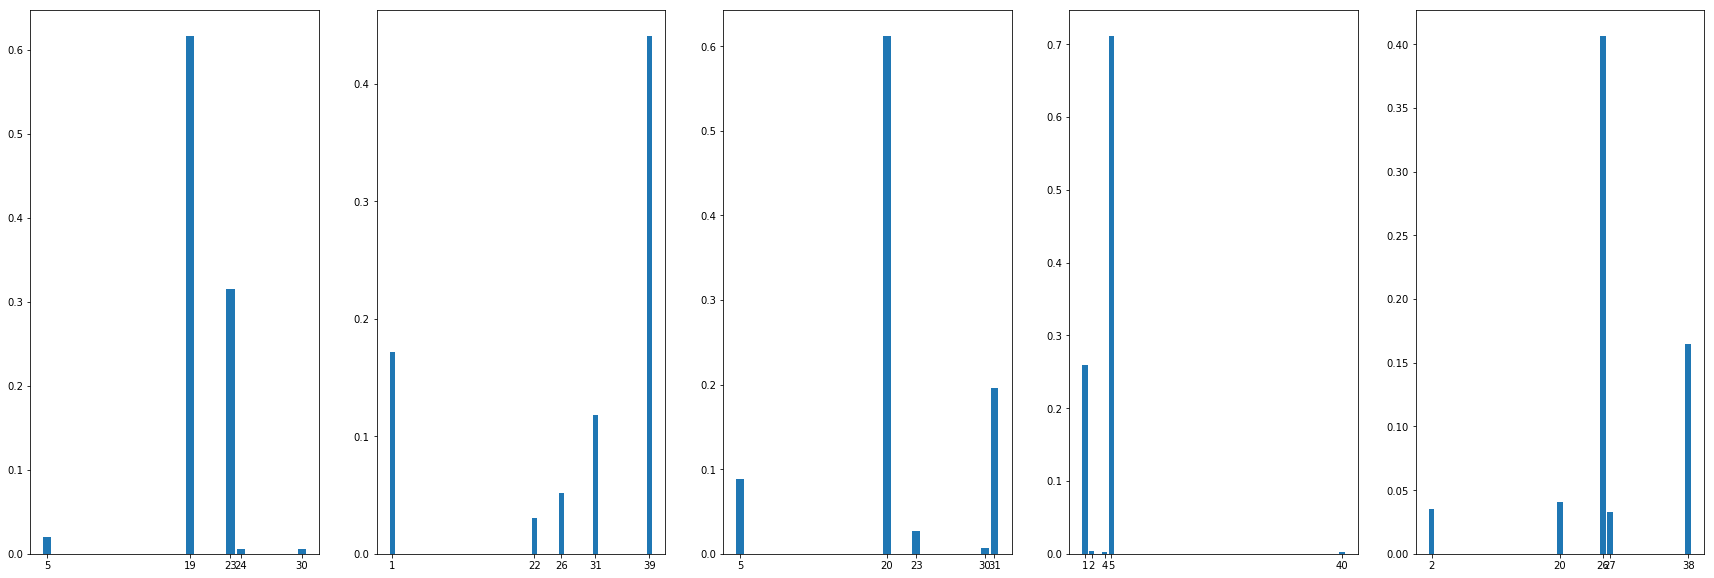

In [26]:
# Predict in trained model
wrong_images_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in wrong_images_display])
wrong_images = wrong_images_gray[:, :, :, np.newaxis]
wrong_images = ((wrong_images - mean_) / std_)
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    prob = tf.nn.softmax(logits = logits)
    top = tf.nn.top_k(prob, k=5)
    result = sess.run(top, feed_dict={x: wrong_images, y: wrong_labels, training: False})
    proba, index = np.array(result)

print(proba)
# Print out predicted probabilities
fig, axes = plt.subplots(1, n_wrong_samples, figsize=(30, 10))
for i in range(n_wrong_samples):
    axes[i].set_xticks(index[i])
    axes[i].bar(index[i] ,proba[i])

We can see that although these images are wrongly predicted, the predicted results' probabilities are not much higher than the others, which means the model doesn't give a high-certainty prediction.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize network's feature maps

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a 
# specific weight layer activation_min/max: can be used to view the activation contrast in more detail, by default matplot 
# sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for 
# each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, training: False})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./Model/model.ckpt


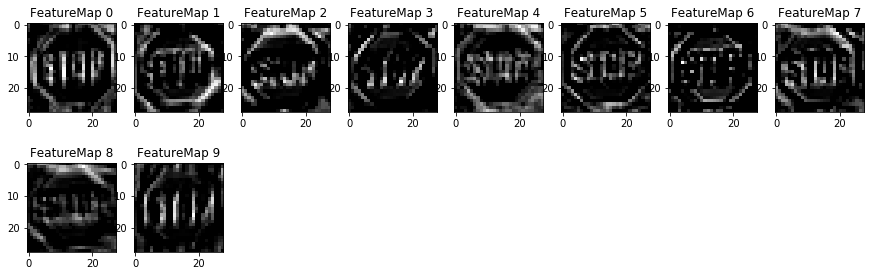

In [28]:
# Visualize first convolutional layer of trained model
with tf.Session() as sess:
    saver.restore(sess, "./Model/model.ckpt")
    image = sample_images[2,:,:,:]
    image = image[np.newaxis,:,:,:]
    outputFeatureMap(image, conv1_a)

Above are the visualized feature maps of the first convolutional layer after activation. We can see from the different feature maps that different filteres are looking for different features of the images. Although we can not tell exactly what the features are considered "interesting" to each filter, we can still tell that traffic sign's boundary and the sign itself are highly activated. 

For example, FeatureMap1 focus on the sign "STOP" while FeatureMap4 activates both the boundary of the board and the "STOP" sign.

From my opinion, the neural network is always considered as a "Black Box' because we can't easily control the result of the training. Every time I trained gave a different FeatureMap result, which is quite confusing. Although the network works, not be able to see what exactly the network is interested in makes the network a "Black Box".